<a href="https://colab.research.google.com/github/mar-valeria/Aprendizaje-automatico/blob/main/SVM/06-SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/06-SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Máquinas de soporte vectorial
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de máquinas de soporte vectorial (SVM) para clasificar un conjunto de datos.

Los paquetes necesarios son:

In [13]:
import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización
import numpy as np

from sklearn.preprocessing import StandardScaler  # Estandarización de datos
from sklearn.datasets import make_blobs, make_circles # Creación de datos
from sklearn.model_selection import train_test_split # División de datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métrica de evaluación

# Algoritmo SVC
from sklearn.svm import SVC

---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase anterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [4]:
# Leer los datos
url = "https://raw.githubusercontent.com/mar-valeria/Aprendizaje-automatico/refs/heads/main/Add_dataset%20_mental_health"
data = pd.read_csv(url, sep=';')
# Tomo las columnas de interés
numeric_cols = ['sleep_hours','physical_activity_days','depression_score','anxiety_score','social_support_score','productivity_score']
class_col = ['stress_level']
data = data[[*numeric_cols, *class_col]]
# Muestro los primeros registros
display(data.head())

,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,stress_level
0,6.2,3,28,17,54,59.7,6
1,9.0,4,30,11,85,54.9,10
2,7.7,2,24,7,62,61.3,7
3,4.5,4,6,0,95,97.0,4
4,5.4,0,24,12,70,69.0,3


In [5]:
data.describe()

,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,stress_level
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,6.473000,3.505700,15.039900,10.56180,50.117700,77.312210,5.572000
std,1.473944,2.282737,8.990839,6.32264,29.229278,14.061202,2.887741
min,3.000000,0.000000,0.000000,0.00000,0.000000,42.800000,1.000000
25%,5.500000,2.000000,7.000000,5.00000,25.000000,65.800000,3.000000
50%,6.500000,4.000000,15.000000,11.00000,50.000000,77.600000,6.000000
75%,7.500000,5.000000,23.000000,16.00000,76.000000,89.200000,8.000000
max,10.000000,7.000000,30.000000,21.00000,100.000000,100.000000,10.000000


In [8]:
# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(data.iloc[:, 1:-1])


### <font color='264CC7'> Determinación del mejor kernel </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el mejor kernel para el modelo SVM.
<ul>
  <li>Genera una gráfica que muestre la precisión de los modelos con diferentes kernels.</li>
  <li>Selecciona el mejor kernel.</li>
</ul>
</div>


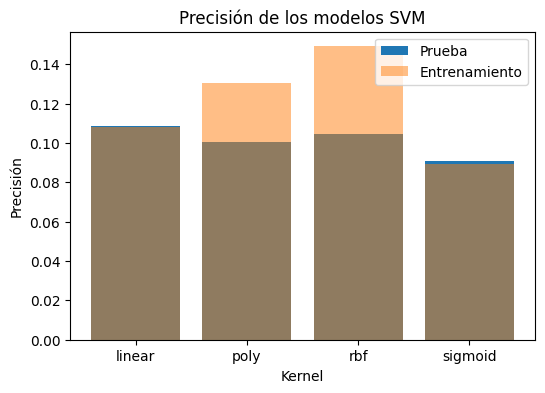

In [10]:
# Variable objetivo
y = data['stress_level']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=55,stratify=y)

# Kernels a evaluar
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']

# Precisión de los modelos
precisions_test = []
precisions_train = []

for kernel in kernel_values:
    modelo = SVC(kernel=kernel)
    modelo.fit(X_train, y_train)

    y_pred_test = modelo.predict(X_test)
    y_pred_train = modelo.predict(X_train)

    precisions_test.append(accuracy_score(y_test, y_pred_test))
    precisions_train.append(accuracy_score(y_train, y_pred_train))

# Visualización
plt.figure(figsize=(6, 4))
plt.bar(kernel_values, precisions_test)
plt.bar(kernel_values, precisions_train, alpha=0.5)
plt.title('Precisión de los modelos SVM')
plt.xlabel('Kernel')
plt.ylabel('Precisión')
plt.legend(['Prueba', 'Entrenamiento'])
plt.show()


Se observa que los kernels lineal, polinómico y RBF presentan precisiones similares, mientras que el kernel sigmoide obtiene el peor desempeño en ambos conjuntos.


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el kernel seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

In [17]:
best_kernel = 'linear'

# Split train/test
y = data['stress_level']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=55, stratify=y
)

# Entrenar modelo
modelo_final = SVC(kernel=best_kernel)
modelo_final.fit(X_train, y_train)

# Predicción
y_pred = modelo_final.predict(X_test)

# Métricas
print("Kernel seleccionado:", best_kernel)
print("Accuracy (test):", round(accuracy_score(y_test, y_pred), 4))
print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred))

# Matriz de confusión
print("Matriz de confusión:\n", cm)
cm = confusion_matrix(y_test, y_pred)

Kernel seleccionado: linear
Accuracy (test): 0.1085

Reporte de clasificación:

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       191
           2       0.00      0.00      0.00       202
           3       0.00      0.00      0.00       188
           4       0.00      0.00      0.00       206
           5       0.00      0.00      0.00       199
           6       0.00      0.00      0.00       193
           7       0.00      0.00      0.00       199
           8       0.00      0.00      0.00       199
           9       0.00      0.00      0.00       206
          10       0.11      1.00      0.20       217

    accuracy                           0.11      2000
   macro avg       0.01      0.10      0.02      2000
weighted avg       0.01      0.11      0.02      2000

Matriz de confusión:
 [[  0   0   0   0   0   0   0   0   0 191]
 [  0   0   0   0   0   0   0   0   0 202]
 [  0   0   0   0   0   0   0   0   0 188]
 [  0   0 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Compara el modelo con otros algoritmos de clasificación vistos en clases anteriores.
</div>

El modelo SVM con kernel lineal presentó un desempeño significativamente inferior al observado con KNN.
El clasificador colapsó prediciendo una única clase, lo que se evidencia en la matriz de confusión y en un accuracy cercano al azar.
Este comportamiento se explica por la naturaleza multiclase y ordinal de la variable stress_level, así como por la alta superposición entre clases, lo que impide una separación lineal efectiva.